# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

# Read csv file

In [2]:
dataset = pd.read_csv("D:\\Research Project\\Datasets\\Flood intensity\\data url\\Final Data\\Classification\\for_dimensionality_reduction1.csv", encoding= 'unicode_escape')
dataset.head()


Unnamed: 0  ID       Area  Log_Area  Area_Affected_per_day  \
0           0   1   92615.67     11.44               23153.92   
1           1   2  678498.82     13.43               37694.38   
2           2   3   12846.03      9.46               12846.03   
3           3   4   16542.12      9.71                1181.58   
4           4   5   20082.21      9.91               10041.10   

   Log_Area_Affected_per_day  Log_Duration  Log_Dead  Log_Displaced  \
0                      10.05          1.61      3.30           8.01   
1                      10.54          2.94      5.44          11.29   
2                       9.46          0.69      3.78           6.10   
3                       7.08          2.71      3.09           5.71   
4                       9.21          1.10      3.00           0.00   

   Day0_Temperature  ...  Day.4_Condition_2  Day.4_Condition_3  \
0             66.20  ...                  0                  0   
1             68.59  ...                  0                  0   
2             77.79  ...                  0                  0   
3             89.60  ...                  0                  0   
4             53.29  ...                  0                  0   

   Day.4_Condition_4  Day.4_Condition_5  Day.4_Condition_6  Day.4_Condition_7  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Day.4_Condition_8  Day.4_Condition_9  Day.4_Condition_10  Flood_Risk  
0                  0                  0                   0         Low  
1                  0                  0                   0        High  
2                  0                  0                   0         Low  
3                  0                  0                   0         Low  
4                  0                  0                   0         Low  

[5 rows x 117 columns]

In [3]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(10851, 117)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Columns: 117 entries, Unnamed: 0 to Flood_Risk
dtypes: float64(22), int64(94), object(1)
memory usage: 9.7+ MB
None
        Unnamed: 0            ID          Area      Log_Area  \
count  10851.00000  10851.000000  1.085100e+04  10851.000000   
mean    5425.00000   2574.302368  1.864237e+05     11.309600   
std     3132.55822   1324.244927  2.603372e+05      1.622261   
min        0.00000      1.000000  1.195650e+01      2.560000   
25%     2712.50000   1443.000000  4.420653e+04     10.700000   
50%     5425.00000   2640.000000  1.217253e+05     11.708245   
75%     8137.50000   3706.000000  2.011250e+05     12.210998   
max    10850.00000   4928.000000  4.814281e+06     15.390000   

       Area_Affected_per_day  Log_Area_Affected_per_day  Log_Duration  \
count           1.085100e+04               10851.000000  10851.000000   
mean            2.823020e+04                   9.331311      2.165262   

In [4]:
# #df_pca = df_pca.drop(['Unnamed: 0','Country','Began','Ended'], axis=1)
df_dm = dataset.drop(['Unnamed: 0','ID','Area','Area_Affected_per_day','Log_Area_Affected_per_day'], axis=1) 
df_dm.dtypes

Log_Area              float64
Log_Duration          float64
Log_Dead              float64
Log_Displaced         float64
Day0_Temperature      float64
Day.1_Temperature     float64
Day.2_Temperature     float64
Day.3_Temperature     float64
Day.4_Temperature     float64
Day0_Dew_Point          int64
Day.1_Dew_Point         int64
Day.2_Dew_Point         int64
Day.3_Dew_Point         int64
Day.4_Dew_Point         int64
Day0_Humidity           int64
Day.1_Humidity          int64
Day.2_Humidity          int64
Day.3_Humidity          int64
Day.4_Humidity          int64
Day0_Wind_Speed       float64
Day.1_Wind_Speed      float64
Day.2_Wind_Speed      float64
Day.3_Wind_Speed      float64
Day.4_Wind_Speed      float64
Day0_Wind_Gust          int64
Day0_Pressure         float64
Day.1_Pressure        float64
Day.2_Pressure        float64
Day.3_Pressure        float64
Day.4_Pressure        float64
                       ...   
Day.2_Condition_6       int64
Day.2_Condition_7       int64
Day.2_Cond

In [5]:
#correlation plot
corr = df_dm.corr()
corr.style.background_gradient(cmap='coolwarm')

In [6]:
df_dm_bck=df_dm

Calculate average of the correlated fields

In [7]:
df_dm["Avg_Temperature"] = (df_dm['Day0_Temperature'] + df_dm['Day.1_Temperature'] + df_dm['Day.2_Temperature'] +df_dm['Day.3_Temperature']+ df_dm['Day.4_Temperature'])/5
df_dm["Avg_Dew_Point"] = (df_dm['Day0_Dew_Point'] + df_dm['Day.1_Dew_Point'] + df_dm['Day.2_Dew_Point'] +df_dm['Day.3_Dew_Point']+ df_dm['Day.4_Dew_Point'])/5
df_dm["Avg_Humidity"] = (df_dm['Day0_Humidity'] + df_dm['Day.1_Humidity'] + df_dm['Day.2_Humidity'] +df_dm['Day.3_Humidity']+ df_dm['Day.4_Humidity'])/5
df_dm["Avg_Wind_Speed"] = (df_dm['Day0_Wind_Speed'] + df_dm['Day.1_Wind_Speed'] + df_dm['Day.2_Wind_Speed'] +df_dm['Day.3_Wind_Speed']+ df_dm['Day.4_Wind_Speed'])/5
#df_dm_bck["Avg_Wind_Gust"] = (df_dm_bck['Day0_Wind_Gust'] + df_dm_bck['Day.1_Wind_Gust'] + df_dm_bck['Day.2_Wind_Gust'] +df_dm_bck['Day.3_Wind_Gust']+ df_dm_bck['Day.4_Wind_Gust'])/5
df_dm["Avg_Pressure"] = (df_dm['Day0_Pressure'] + df_dm['Day.1_Pressure'] + df_dm['Day.2_Pressure'] +df_dm['Day.3_Pressure']+ df_dm['Day.4_Pressure'])/5

In [8]:
df_dm.drop(['Day0_Temperature', 'Day.1_Temperature','Day.2_Temperature','Day.3_Temperature','Day.4_Temperature','Day0_Dew_Point','Day.1_Dew_Point','Day.2_Dew_Point','Day.3_Dew_Point','Day.4_Dew_Point','Day0_Humidity','Day.1_Humidity','Day.2_Humidity','Day.3_Humidity','Day.4_Humidity','Day0_Wind_Speed','Day.1_Wind_Speed','Day.2_Wind_Speed','Day.3_Wind_Speed','Day.4_Wind_Speed','Day0_Pressure','Day.1_Pressure','Day.2_Pressure','Day.3_Pressure','Day.4_Pressure'], axis=1, inplace=True)


In [9]:
#correlation plot
corr = df_dm_bck.corr()
corr.style.background_gradient(cmap='coolwarm')

In [56]:
# Separating out the features
x = df_dm[[
'Log_Duration',
'Log_Dead',
'Log_Displaced',
'Avg_Temperature','Avg_Dew_Point','Avg_Humidity','Avg_Wind_Speed','Avg_Pressure',
    'MainCause_0',
'MainCause_1',
'MainCause_2',
'MainCause_3',
'MainCause_4',
'MainCause_5',
'MainCause_6',
'MainCause_7',
'MainCause_8',
'MainCause_9',
'MainCause_10',
'MainCause_11',
'MainCause_12',
'MainCause_13',
'MainCause_14',
'MainCause_15',
'MainCause_16',
'MainCause_17',
'MainCause_18',
'MainCause_19',
'MainCause_20',
'MainCause_21',
'MainCause_22',
'Day0_Condition_0',
'Day0_Condition_1',
'Day0_Condition_2',
'Day0_Condition_3',
'Day0_Condition_4',
'Day0_Condition_5',
'Day0_Condition_6',
'Day0_Condition_7',
'Day0_Condition_8',
'Day0_Condition_9',
'Day0_Condition_10',
'Day0_Condition_11',
'Day0_Condition_12',
'Day0_Condition_13',
'Day.1_Condition_0',
'Day.1_Condition_1',
'Day.1_Condition_2',
'Day.1_Condition_3',
'Day.1_Condition_4',
'Day.1_Condition_5',
'Day.1_Condition_6',
'Day.1_Condition_7',
'Day.1_Condition_8',
'Day.2_Condition_0',
'Day.2_Condition_1',
'Day.2_Condition_2',
'Day.2_Condition_3',
'Day.2_Condition_4',
'Day.2_Condition_5',
'Day.2_Condition_6',
'Day.2_Condition_7',
'Day.2_Condition_8',
'Day.2_Condition_9',
'Day.2_Condition_10',
'Day.2_Condition_11',
'Day.2_Condition_12',
'Day.2_Condition_13',
'Day.2_Condition_14',
'Day.2_Condition_15',
'Day.3_Condition_0',
'Day.3_Condition_1',
'Day.3_Condition_2',
'Day.3_Condition_3',
'Day.3_Condition_4',
'Day.3_Condition_5',
'Day.3_Condition_6',
'Day.3_Condition_7',
'Day.4_Condition_0',
'Day.4_Condition_1',
'Day.4_Condition_2',
'Day.4_Condition_3',
'Day.4_Condition_4',
'Day.4_Condition_5',
'Day.4_Condition_6',
'Day.4_Condition_7',
'Day.4_Condition_8',
'Day.4_Condition_9',
'Day.4_Condition_10'
    
]].values

# Separating out the target
y = df_dm['Flood_Risk'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


# Principle Component Analysis

In [57]:
pca = PCA(.99)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df_dm[['Flood_Risk']]], axis = 1)
pca.explained_variance_ratio_

array([0.0522667 , 0.04344287, 0.03395899, 0.02424906, 0.02371679,
       0.02267401, 0.02059599, 0.01721727, 0.01622344, 0.01503216,
       0.01475389, 0.01409307, 0.01368107, 0.01349266, 0.01324723,
       0.01299988, 0.01280881, 0.01263578, 0.01255185, 0.01244037,
       0.01225624, 0.01183045, 0.01178417, 0.01167065, 0.01159935,
       0.01152647, 0.01141472, 0.01139443, 0.01134827, 0.01133605,
       0.01132505, 0.01129357, 0.01126418, 0.01125629, 0.01124938,
       0.01124712, 0.01124552, 0.01124501, 0.01124165, 0.0112409 ,
       0.01124018, 0.01123864, 0.01123817, 0.01123739, 0.01123727,
       0.01123407, 0.01121955, 0.01119931, 0.01116697, 0.01109326,
       0.01107863, 0.01103999, 0.01088629, 0.01065393, 0.01045409,
       0.0102991 , 0.01024869, 0.01014688, 0.01000646, 0.00966456,
       0.0096233 , 0.0095717 , 0.0092411 , 0.00897157, 0.00888589,
       0.00876122, 0.0085105 , 0.00792724, 0.00783741, 0.00759528,
       0.00686911, 0.00665172, 0.00619892, 0.00596085, 0.00572

In [58]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_dm[['Flood_Risk']]], axis = 1)
finalDf.head(5)

principal component 1  principal component 2 Flood_Risk
0              -0.728361              -1.761666        Low
1              -0.716477              -0.838299       High
2              -0.513491              -2.006551        Low
3              -0.716494              -2.115690        Low
4               0.255432               3.096332        Low

In [59]:
pca.explained_variance_ratio_

array([0.0522667 , 0.04344287])

In [60]:
pca.n_components_

2

In [61]:
finalDf['principal component 1'] = round(finalDf['principal component 1'],2 )
finalDf['principal component 2'] = round(finalDf['principal component 2'],2 )

finalDf

principal component 1  principal component 2 Flood_Risk
0                      -0.73                  -1.76        Low
1                      -0.72                  -0.84       High
2                      -0.51                  -2.01        Low
3                      -0.72                  -2.12        Low
4                       0.26                   3.10        Low
5                      -0.50                  -1.69        Low
6                      -0.10                  -0.90        Low
7                      -0.67                  -2.08        Low
8                       0.31                   1.68       High
9                      -0.22                   0.08        Low
10                      0.55                   2.86        Low
11                      0.44                   1.71        Low
12                      0.08                   2.22   Moderate
13                      0.24                   0.92        Low
14                     -0.25                   1.50       High
15                     -0.21                  -0.38        Low
16                     -0.38                  -0.07       High
17                      0.09                   0.73        Low
18                      0.40                   1.61   Moderate
19                      0.07                   1.79        Low
20                     -0.92                  -2.27       High
21                     -0.24                   0.30        Low
22                     -0.73                  -2.37        Low
23                     -0.40                  -1.04        Low
24                     -0.06                   0.83        Low
25                     -1.01                  -2.68        Low
26                     -0.70                  -2.28       High
27                     -0.94                  -2.32       High
28                     -0.77                  -2.11        Low
29                     -0.30                  -0.97        Low
...                      ...                    ...        ...
10821                  -0.39                  -1.14   Moderate
10822                  -0.72                  -1.73   Moderate
10823                   0.51                   0.97   Moderate
10824                  -0.86                  -2.19   Moderate
10825                  -0.42                  -1.07   Moderate
10826                  -0.02                  -0.24   Moderate
10827                   0.06                   0.14   Moderate
10828                   0.12                  -0.22   Moderate
10829                  -0.07                   1.43   Moderate
10830                  -0.33                  -0.69   Moderate
10831                  -0.28                  -0.49   Moderate
10832                  -0.07                  -0.16   Moderate
10833                  -0.01                  -0.21   Moderate
10834                   0.19                   0.16   Moderate
10835                  -0.08                  -0.27   Moderate
10836                  -0.57                  -1.40   Moderate
10837                  -0.00                  -0.00   Moderate
10838                  -0.35                  -1.03   Moderate
10839                  -0.20                  -0.80   Moderate
10840                   0.10                  -0.18   Moderate
10841                  -0.47                  -1.53   Moderate
10842                   0.22                   0.72   Moderate
10843                  -0.39                  -1.69   Moderate
10844                   0.01                  -0.10   Moderate
10845                   0.06                   0.13   Moderate
10846                   0.35                   2.19   Moderate
10847                  -0.48                  -1.07   Moderate
10848                   0.29                   0.65   Moderate
10849                   0.07                   0.29   Moderate
10850                  -0.31                  -0.29   Moderate

[10851 rows x 3 columns]

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

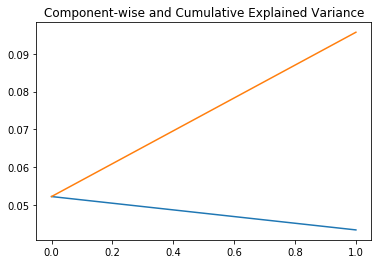

In [62]:
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

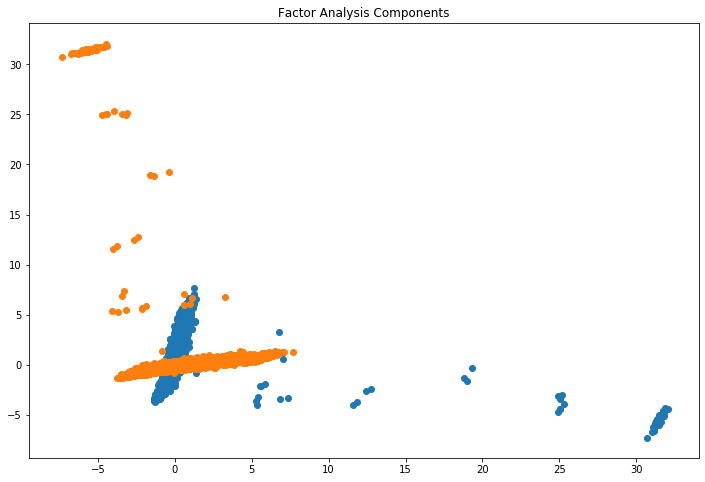

In [63]:
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.scatter(principalComponents[:,1], principalComponents[:,0])

# principalComponents[:1]

In [18]:
corr = finalDf.corr()
corr.style.background_gradient(cmap='coolwarm')

In [19]:
L = [9.47546e-07, -4.34653e-07]
for i in L: 
    
    print( "%.16f" % float(i))

0.0000009475460000
-0.0000004346530000


In [25]:
finalDf.isna().sum()

principal component 1    0
principal component 2    0
Flood_Risk               0
dtype: int64

Check accuracy with ML model

In [26]:
# #run model 
X = finalDf[['principal component 1','principal component 2'
        
       ]].values
y = finalDf['Flood_Risk'].values


In [28]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
#Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=94)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.482726853984339

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25)
#clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42883463841547675


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth= 8, max_features='auto')
rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4891754951635191


# t-SNE

In [20]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=50.0, n_iter=1000).fit_transform(x)
tSNEDf = pd.DataFrame(data = X_embedded
             , columns = ['tSNE component 1', 'tSNE component 2'])
tDf = pd.concat([tSNEDf, df_dm[['Flood_Risk']]], axis = 1)
tDf.head(5)



tSNE component 1  tSNE component 2 Flood_Risk
0         12.476761        -53.446903        Low
1          8.127088        -19.942755       High
2         38.494057         46.350132        Low
3         36.600803         59.479385        Low
4         -0.868893         37.431561        Low

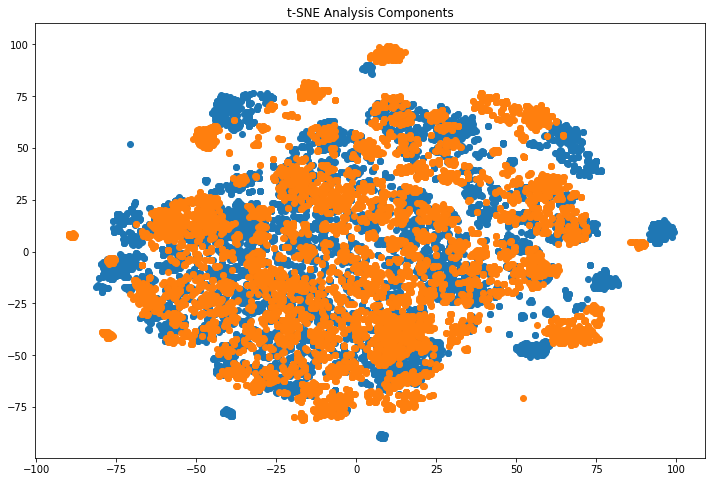

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('t-SNE Analysis Components')
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.scatter(X_embedded[:,1], X_embedded[:,0])
#plt.scatter(X_embedded[:,2], X_embedded[:,0])


In [37]:
# #run model 
X = tSNEDf[['tSNE component 1', 'tSNE component 2'
        
       ]].values
y = df_dm['Flood_Risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)

(8680, 2)
(8680,)
(2171, 2)
(2171,)
['Moderate' 'High' 'Moderate' ... 'Moderate' 'Moderate' 'Low']


Check accuracy with ML models

In [38]:
#Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.6844771994472594

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25)
#clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6973744818056196


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth= 8, max_features='auto')
rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6338093044679871


# SVD

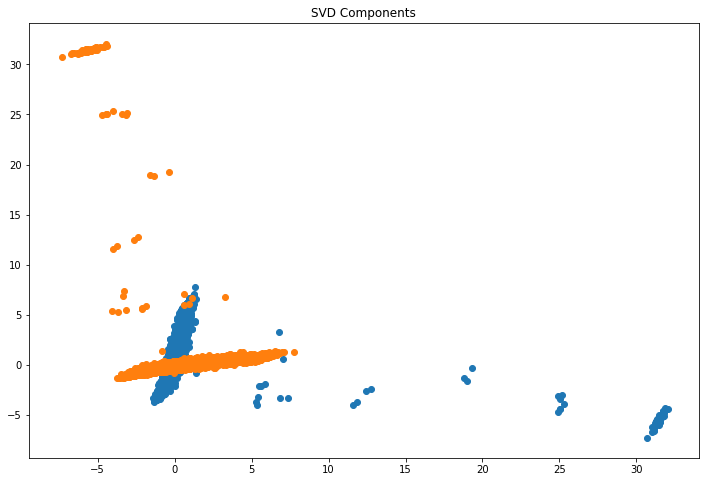

In [64]:
#SVD
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(x)
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,0])
#plt.scatter(svd[:,2],svd[:,0])

In [41]:
svdDf = pd.DataFrame(data = svd
             , columns = ['svd component 1', 'svd component 2'])
svdf = pd.concat([svdDf, df_dm[['Flood_Risk']]], axis = 1)
svdf.head(5)

svd component 1  svd component 2 Flood_Risk
0        -0.728859        -1.762036        Low
1        -0.716112        -0.837863       High
2        -0.513427        -2.008589        Low
3        -0.716670        -2.117501        Low
4         0.254077         3.096960        Low

In [42]:
# #run model 
X = svdDf[['svd component 1', 'svd component 2'
        
       ]].values
y = df_dm['Flood_Risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)

(8680, 2)
(8680,)
(2171, 2)
(2171,)
['Moderate' 'High' 'Moderate' ... 'Moderate' 'Moderate' 'Low']


Check accuracy with ML models

In [43]:
#Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.45601105481345

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25)
#clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4311377245508982


In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25)
#clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.426070935052971


# ICA

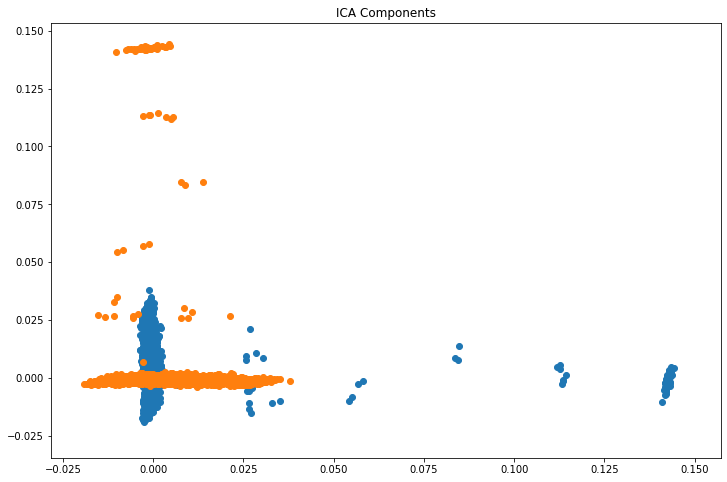

In [65]:
#Independent Component Analysis
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=12) 
a=ICA.fit_transform(x)
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(a[:,0], a[:,1])
plt.scatter(a[:,1], a[:,0])
#plt.scatter(a[:,2], a[:,0])

In [46]:
ICADf = pd.DataFrame(data = a
             , columns = ['ICA component 1', 'ICA component 2'])
icadf = pd.concat([ICADf, df_dm[['Flood_Risk']]], axis = 1)
icadf.head(5)

ICA component 1  ICA component 2 Flood_Risk
0        -0.001632        -0.009044        Low
1        -0.002396        -0.004600       High
2        -0.000474        -0.010050        Low
3        -0.001266        -0.010737        Low
4        -0.001619         0.015073        Low

In [47]:
# #run model 
X = icadf[['ICA component 1', 'ICA component 2'
        
       ]].values
y = df_dm['Flood_Risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)


(8680, 2)
(8680,)
(2171, 2)
(2171,)
['Moderate' 'High' 'Moderate' ... 'Moderate' 'Moderate' 'Low']


Check accuracy with ML models

In [48]:
#Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)


0.4546292031321971

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25)
#clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4246890833717181


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth= 8, max_features='auto')
rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5011515430677107


# Isomap

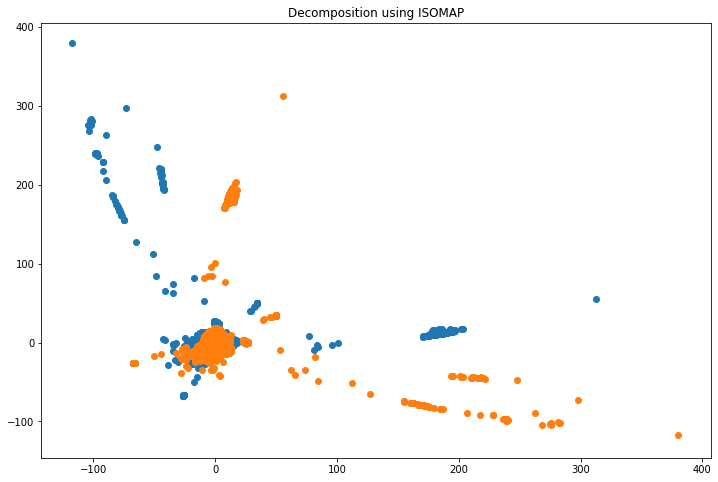

In [24]:
#Isomap
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=2, n_jobs=-1).fit_transform(x)
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,0])
#plt.scatter(trans_data[:,2], trans_data[:,0])

In [51]:
IsomapDf = pd.DataFrame(data = trans_data
             , columns = ['IsomapDf component 1', 'IsomapDf component 2'])
isomapdf = pd.concat([IsomapDf, df_dm[['Flood_Risk']]], axis = 1)
isomapdf.head(5)

IsomapDf component 1  IsomapDf component 2 Flood_Risk
0             -4.554133              1.193638        Low
1              0.283716             -0.256813       High
2             -3.135066             -0.175644        Low
3            -11.083439              9.581136        Low
4             -7.203009             -0.148169        Low

In [52]:
# #run model 
X = IsomapDf[['IsomapDf component 1', 'IsomapDf component 2'
        
       ]].values
y = df_dm['Flood_Risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)

(8680, 2)
(8680,)
(2171, 2)
(2171,)
['Moderate' 'High' 'Moderate' ... 'Moderate' 'Moderate' 'Low']


Check accuracy with ML models

In [53]:
#Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.5246430216490097

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25)
#clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4960847535697835


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth= 8, max_features='auto')
rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5301704283740212
